In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = 'SMA_data.csv'  
data = pd.read_csv(file_path)

In [12]:
#Checking missing values
data.isnull().sum()

Datetime    0
SMA         0
dtype: int64

In [13]:
#Data Preprocessing
data['Datetime'] = pd.to_datetime(data['Datetime'])  # Convert Datetime column to pandas datetime
data = data.sort_values(by='Datetime')  # Data is sorted by time

In [14]:
#Feature Extraction: Calculate the SMA difference between consecutive entries
data['SMA_diff'] = data['SMA'].diff()

In [18]:
#Thresholding: Set a threshold for detecting maneuvers based on SMA variation
#Using heuristic approach: assume that changes beyond a certain threshold indicate a maneuver
threshold = 3 * data['SMA_diff'].std()  # 3 standard deviations from the mean change

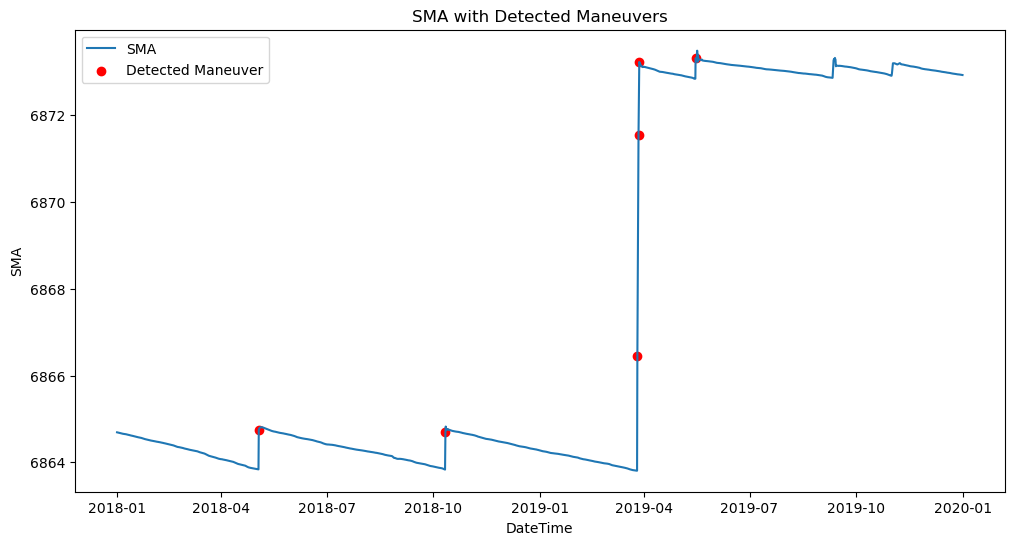

Detected Maneuvers:
                       Datetime          SMA  SMA_diff
384  2018-05-03 12:01:31.056960  6864.749568  0.911916
871  2018-10-11 13:37:04.556640  6864.695930  0.862714
1421 2019-03-26 04:53:33.243936  6866.447702  2.640831
1422 2019-03-27 04:34:36.436800  6871.548711  5.101009
1423 2019-03-27 20:25:37.599168  6873.222542  1.673831
1583 2019-05-15 10:44:36.864096  6873.309430  0.472244
Detected maneuvers detected_maneuvers.csv


In [20]:
#Detect maneuvers where the absolute SMA difference exceeds the threshold
data['Maneuver'] = np.where(data['SMA_diff'].abs() > threshold, 1, 0)

# Extract only the rows with detected maneuvers
maneuvers = data[data['Maneuver'] == 1]

# Visualization: Plot the SMA values over time, and mark the detected maneuvers
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['SMA'], label='SMA')
plt.scatter(maneuvers['Datetime'], maneuvers['SMA'], color='red', label='Detected Maneuver', marker='o')
plt.title('SMA with Detected Maneuvers')
plt.xlabel('DateTime')
plt.ylabel('SMA')
plt.legend()

plt.show()

# Output the maneuver details (Datetime and SMA)
print("Detected Maneuvers:")
print(maneuvers[['Datetime', 'SMA', 'SMA_diff']])

# Save the results to a new CSV
output_file_path = 'detected_maneuvers.csv'
maneuvers.to_csv(output_file_path, index=False)
print(f"Detected maneuvers {output_file_path}")